<a href="https://colab.research.google.com/github/andromos00/Tugas/blob/main/Tugas_Besar_RozanNauf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fungsi Pertama


In [271]:
import numpy as np
import matplotlib.pyplot as plt

In [248]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log10(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [249]:
def powerRx(ptx,pL,gtx,grx):
    ptx = 10*np.log10(ptx*1000)
    prx = ptx-pL+gtx+grx
    prx = 10**(prx/10)

    return prx

In [250]:
f1=1800 #MHz
f2=900 #MHz
f3=700 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [251]:
#PathlossLocation
LpUrban=cos(f1,loc1,tower,user,d)
LpSuburban=cos(f1,loc2,tower,user,d)
LpOpen=cos(f1,loc3,tower,user,d)

#Power
powerUrban=powerRx(30,LpUrban,10,2)
powerSuburban=powerRx(30,LpSuburban,10,2)
powerOpen=powerRx(30,LpOpen,10,2)

In [252]:
d_sort=d[np.argsort(d)]
Urban_sort=powerUrban[np.argsort(d)]
Suburban_sort=powerSuburban[np.argsort(d)]
Open_sort=powerOpen[np.argsort(d)]

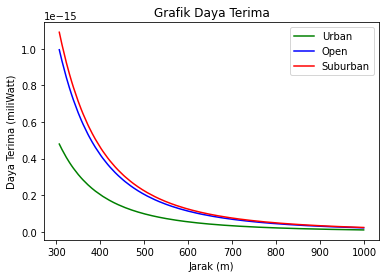

In [253]:
plt.figure()
plt.plot(d_sort,Urban_sort,color='Green',label='Urban')
plt.plot(d_sort,Open_sort,color='Blue',label='Open')
plt.plot(d_sort,Suburban_sort,color='Red',label='Suburban')
plt.legend()
plt.title('Grafik Daya Terima')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

In [254]:
#PathlossFreq
freq1=cos(f1,loc1,tower,user,d)
freq2=cos(f2,loc1,tower,user,d)
freq3=cos(f3,loc1,tower,user,d)

#Power
powerfreq1=powerRx(30,freq1,10,2)
powerfreq2=powerRx(30,freq2,10,2)
powerfreq3=powerRx(30,freq3,10,2)

In [255]:
d_sort=d[np.argsort(d)]
freq1_sort=powerfreq1[np.argsort(d)]
freq2_sort=powerfreq2[np.argsort(d)]
freq3_sort=powerfreq3[np.argsort(d)]

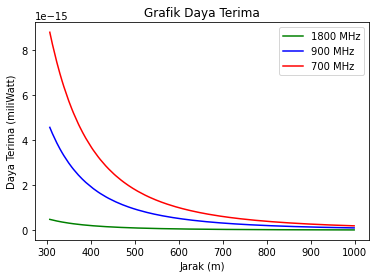

In [256]:
plt.figure()
plt.plot(d_sort,freq1_sort,color='Green',label='1800 MHz')
plt.plot(d_sort,freq2_sort,color='Blue',label='900 MHz')
plt.plot(d_sort,freq3_sort,color='Red',label='700 MHz')
plt.legend()
plt.title('Grafik Daya Terima')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

Fungsi Kedua

In [274]:
def sner(prx,bw):
    bw = bw*10**6 #Hz
    prx = 10*np.log10(prx*1000)
    no = -174+10*np.log10(bw)
    no = 10**(prx/10)
    snr = prx/no

    return snr

In [258]:
#SNR Location
snrUrban=sner(powerUrban,5)
snrSuburban=sner(powerSuburban,5)
snrOpen=sner(powerOpen,5)

In [259]:
d_sort=d[np.argsort(d)]
Urban_sort=snrUrban[np.argsort(d)]
Suburban_sort=snrSuburban[np.argsort(d)]
Open_sort=snrOpen[np.argsort(d)]

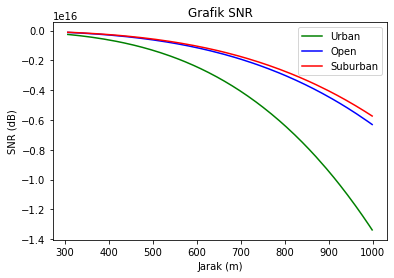

In [260]:
plt.figure()
plt.plot(d_sort,Urban_sort,color='Green',label='Urban')
plt.plot(d_sort,Open_sort,color='Blue',label='Open')
plt.plot(d_sort,Suburban_sort,color='Red',label='Suburban')
plt.legend()
plt.title('Grafik SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

In [282]:
#SNR Frequency
snrfreq1=sner(powerfreq1,5)
snrfreq2=sner(powerfreq2,5)
snrfreq3=sner(powerfreq3,5)

In [283]:
d_sort=d[np.argsort(d)]
freq1_sort=snrfreq1[np.argsort(d)]
freq2_sort=snrfreq2[np.argsort(d)]
freq3_sort=snrfreq3[np.argsort(d)]

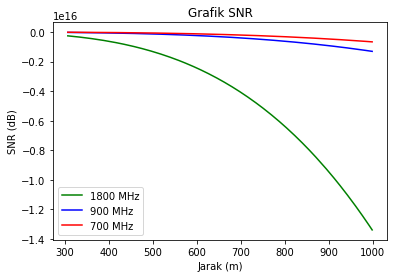

In [303]:
plt.figure()
plt.plot(d_sort,freq1_sort,color='Green',label='1800 MHz')
plt.plot(d_sort,freq2_sort,color='Blue',label='900 MHz')
plt.plot(d_sort,freq3_sort,color='Red',label='700 MHz')
plt.legend()
plt.title('Grafik SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

Fungsi Ketiga

In [296]:
def kapsel(snr,bw):
    bw=bw*10**6
    kps=bw*(np.emath.log2(1+snr))
    
    return kps

In [297]:
#KapasitasSeluler Location
kapselUrban=kapsel(snrUrban,5)
kapselSuburban=kapsel(snrSuburban,5)
kapselOpen=kapsel(snrOpen,5)

In [298]:
d_sort=d[np.argsort(d)]
Urban_sort=kapselUrban[np.argsort(d)]
Suburban_sort=kapselSuburban[np.argsort(d)]
Open_sort=kapselOpen[np.argsort(d)]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


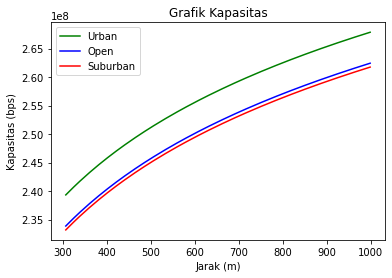

In [299]:
plt.figure()
plt.plot(d_sort,Urban_sort,color='Green',label='Urban')
plt.plot(d_sort,Open_sort,color='Blue',label='Open')
plt.plot(d_sort,Suburban_sort,color='Red',label='Suburban')
plt.legend()
plt.title('Grafik Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [300]:
#KapasitasSeluler Frequency
kapselfreq1=kapsel(snrfreq1,5)
kapselfreq2=kapsel(snrfreq2,5)
kapselfreq3=kapsel(snrfreq3,5)

In [304]:
d_sort=d[np.argsort(d)]
freq1_sort=kapselfreq1[np.argsort(d)]
freq2_sort=kapselfreq2[np.argsort(d)]
freq3_sort=kapselfreq3[np.argsort(d)]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


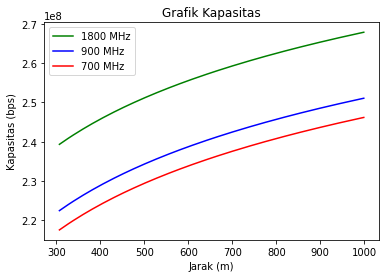

In [305]:
plt.figure()
plt.plot(d_sort,freq1_sort,color='Green',label='1800 MHz')
plt.plot(d_sort,freq2_sort,color='Blue',label='900 MHz')
plt.plot(d_sort,freq3_sort,color='Red',label='700 MHz')
plt.legend()
plt.title('Grafik Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()